In [81]:
import numpy as np
import matplotlib.pyplot as plt           
        
file_dict={
    0:"a",
    1:"b",
    2:"c",
    3:"d",
    4:"e",
    5:"f",
    6:"g",
    7:"h"
}

inverse_file_dict={
    "a":0,
    "b":1,
    "c":2,
    "d":3,
    "e":4,
    "f":5,
    "g":6,
    "h":7
}


In [41]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
file_dict[1]

'b'

In [169]:

class Board:#coord rank is the row, file is the column
    
    '''
    I have still not implemented certain restrictions for moving through check and stopping a king from
    casteling illegally. I do not need these for my purposes
    '''
    
    
    def __init__(self):
        self.squares=[]
        self.turn="W"
        for i in range(8):
            self.squares.append([])
            for j in range(8):
                
                if(i==1 or i==6):
                    colour="W"
                    rank_pieces=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']
                    if(i==6):
                        colour="B"
                    self.squares[-1].append(Square(self,(i,j),rank_pieces[j],colour))
                elif(i==0 or i==7):
                    colour="W"
                    rank_pieces=['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R']
                    if(i==7):
                        colour="B"
                    self.squares[-1].append(Square(self,(i,j),rank_pieces[j],colour))
                else:
                    self.squares[-1].append(Square(self,(i,j),"",""))
                    
    def possible_moves(self):
        squares_to_move=[]
        poss=[]
        for i in range(8):
            for j in range(8):
                if(self.squares[i][j].colour==self.turn):
                    squares_to_move.append(self.squares[i][j])
                    
        for sq in squares_to_move:
            cur=sq.possible_moves()
            for i in range(0,len(cur)):
                if(type(cur[i])!=str):
                    cur[i]=np.concatenate((sq.coord,cur[i]))
                    
            poss+=cur
            
        return poss
    
    def makeMove(self,move):
        if(type(move)==str):
            if(move!="KCastle" and move!="QCastle"):#this move must be in pgn format
                move=self.pgnformat_to_moves(move)
        
        if(type(move)!=str):
            if self.squares[int(move[0])][int(move[1])].piece=="K":
                self.squares[int(move[0])][int(move[1])].additionalInfo.append("CC")
            
            self.squares[int(move[2])][int(move[3])].colour=self.squares[int(move[0])][int(move[1])].colour
            
            if(np.shape(move)[0]<=4 or self.squares[int(move[0])][int(move[1])].piece!="P"):#Not a promotion
                self.squares[int(move[2])][int(move[3])].piece=self.squares[int(move[0])][int(move[1])].piece
            else:
                self.squares[int(move[2])][int(move[3])].piece=move[4]
                
            self.squares[int(move[2])][int(move[3])].additionalInfo=self.squares[int(move[0])][int(move[1])].additionalInfo
            
            if(self.squares[int(move[2])][int(move[3])].piece=="P"):
                if(abs(int(move[2])-int(move[0]))>1):
                    self.squares[int(move[2])][int(move[3])].additionalInfo.append("EP")
                 
            self.squares[int(move[0])][int(move[1])].colour=""
            self.squares[int(move[0])][int(move[1])].piece=""
            self.squares[int(move[0])][int(move[1])].additionalInfo=[]
            
            
            
        else:#castling
            rank=0#initialise
            if(self.turn=="W"):
                rank=0
            else:
                rank=7
                    
            if(move=="KCastle"):
                oldKsq= self.squares[rank][4]
                oldRsq= self.squares[rank][7]
                newKsq= self.squares[rank][6]
                newRsq= self.squares[rank][5]
                
                newKsq.colour=oldKsq.colour
                newKsq.piece =oldKsq.piece
                newKsq.additionalInfo=oldKsq.additionalInfo+["CC"]
                newRsq.colour=oldRsq.colour
                newRsq.piece =oldRsq.piece
                newRsq.additionalInfo=oldRsq.additionalInfo
                
                oldKsq.colour=""
                oldKsq.piece=""
                oldKsq.additionalInfo=[]
                oldRsq.colour=""
                oldRsq.piece=""
                oldRsq.additionalInfo=[]
                
            if(move=="QCastle"):
                oldKsq= self.squares[rank][4]
                oldRsq= self.squares[rank][0]
                newKsq= self.squares[rank][2]
                newRsq= self.squares[rank][3]
                
                newKsq.colour=oldKsq.colour
                newKsq.piece =oldKsq.piece
                newKsq.additionalInfo=oldKsq.additionalInfo+["CC"]
                newRsq.colour=oldRsq.colour
                newRsq.piece =oldRsq.piece
                newRsq.additionalInfo=oldRsq.additionalInfo
                
                oldKsq.colour=""
                oldKsq.piece=""
                oldKsq.additionalInfo=[]
                oldRsq.colour=""
                oldRsq.piece=""
                oldRsq.additionalInfo=[]
                
                
        for i in range(8):
            for j in range(8):
                if(self.squares[i][j].colour==self.turn and self.squares[i][j].colour=="P"):
                    if("EP" in self.squares[i][j].additionalInfo):
                        self.squares[i][j].additionalInfo.pop(self.squares[i][j].additionalInfo.index("EP"))
                   
        
        
        if(self.turn =="W"):
            self.turn="B"
        else:
            self.turn="W"
    
    def print_board(self):
        
        print("White`s turn" if self.turn=="W" else "Black`s turn")
        for i in range(-1,-9,-1):
            l=([(self.squares[i][j].piece+" ")  for j in range(8)])
            st=""
            for c in l:
                if(c==" "):
                    c="  "
                st+=c
            print(st)

        print()
        print()
        
    def display_board(self):
        plt.figure(figsize=(5,5))
        plt.xlim(0,8)
        plt.ylim(0,8)
        for i in range(8):
            #l=([(self.squares[i][j].piece+" ")  for j in range(8)])
            
            for j in range(8):
                c=self.squares[i][j].piece
                colour= "red" if self.squares[i][j].colour=="W" else "black"
                square_colour = "saddlebrown" if (i+j)%2==0 else "palegoldenrod"
                plt.gca().add_patch(
                    plt.Rectangle((j,(i)),1,1,color=square_colour,fill=True)
                )
                if(c==" "):
                    pass
                else:
                    plt.text(j+0.5,i+0.5,c,fontdict={'color':colour,'fontsize':'x-large'},horizontalalignment='center',verticalalignment='center')
                
        plt.show()
        
    def s(self,c):
        '''Quick way of getting square object for coord'''
        return self.squares[c[0]][c[1]]
    
    def pgnformat_to_moves(self, st):
        st=st.replace("#","")#support for hash not yet included. :(
        if(st=="O-O"):
            return "KCastle"
        elif(st=="O-O-O"):
            return "QCastle"
        else:
            l=[]
            #l is the full description of the move in internal format -[c1r,c1f,c2r,c2f (,promotion info)]
            #I add elements to l in reverse
            st=st.replace("+","").replace("x","")
            if("=" in st):
                l.append(st[-2:])#promotion info
                st=st[:-2]
              
            #target squares should go before 
            l.insert(0,int(st[-1])-1)
            l.insert(1,inverse_file_dict[st[-2]])#file coordinate goes after rank
            
            if(st[0] not in "RNBQK"):#case sensitive
                st="P"+st#a pawn must`ve moved 
                
            st=st[:-2]
            piece=st[0]
            
            possible_coords=[]#originating from
            for i in range(0,8):
                for j in range(0,8):
                    if (self.squares[i][j].piece==piece) and (self.squares[i][j].colour==self.turn):
                        range_of_coords_square=self.squares[i][j].possible_moves()
                        for k in range_of_coords_square: 
                            if(k[0]==l[0] and k[1]==l[1]):
                                possible_coords.append(np.array([i,j]))
                                break#only exits k loop

            
            for i in st[1:]:#going through the coordinates which deal with ambiguity (e.g. Ba2xb3 - we are looking at a2)
                #go through origin letters if their are any, 
                #possible_coords should have only one entry after this is completed
                
                if(i.isnumeric()):#this means we are talking about a rank
                    rank=int(i)-1#non-interface coordinates go 0-7 not 1-8
                    j=0
                    while (j<len(possible_coords)):
                        if(possible_coords[j][0]!=rank):
                            possible_coords.pop(j)
                        else:
                            j+=1
                            
                else:#dealing with files
                    file=inverse_file_dict[i]#non-interface coordinates go 0-7 not 1-8
                    j=0
                    while (j<len(possible_coords)):
                        if(possible_coords[j][1]!=file):
                            possible_coords.pop(j)
                        else:
                            j+=1
                            
                          
            if(len(possible_coords)==0):
                print("len(possible_coords)==0-something went wrong")
            
            l.insert(0,possible_coords[0][1])#should go before 
            l.insert(0,possible_coords[0][0])
            l=np.array(l)
            return l #this will be numpy array of form [c1r,c1f,c2r,c2f (,promotion info)]
                            
            
    
    def moves_to_pgnformat(self,poss_moves):
        ret=[]
        for i in poss_moves:
        #for i in range(0,len(poss_moves)):
            if(i !="KCastle" and i !="QCastle"):
                st=self.squares[int(i[0])][int(i[1])].piece
                if st=="P":
                    st=""


                #for j in range(0,len(poss_moves)) :
                for j in poss_moves:
                    if(j=="KCastle" or j !="QCastle"):
                        continue # skip this iteration of the loop
                        
                    add=""
                    if((int(i[2])==int(j[2]) and int(i[3])==int(j[3]))#go to same square
                       and  not (int(i[0])==int(j[0]) and int(i[1])==int(j[1]))#not from same square
                       and self.squares[int(i[0])][int(i[1])].piece==self.squares[int(j[0])][int(j[1])].piece#same piece type
                       and self.squares[int(i[0])][int(i[1])].colour==self.squares[int(j[0])][int(j[1])].colour#same colour (redundancy)
                      ):#account for ambiguity of which piece
                        if(int(i[0])==int(j[0])):#same rank
                            if(str(int(i[0])+1) not in add):
                                add=add+str(int(i[0])+1)#order important in rare cases

                        if(int(i[1])==int(j[1])):#same file
                            if(file_dict[(int(i[1]))] not in add):
                                add=file_dict[(int(i[1]))]+add#order important in rare cases

                add=""
                if self.squares[int(i[2])][int(i[3])].piece!="":#must be taking a piece
                    add=add+"x"


                st=st+add+file_dict[(int(i[3]))]+str(int(i[2])+1)

                if(len(i)>4):#promotion
                    st+=i[4]#add "=Q" if promoting to queen


                #Must check for check
                phantom_square=Square(self,np.array([int(i[2]),int(i[3])]),self.squares[int(i[0])][int(i[1])].piece,self.squares[int(i[0])][int(i[1])].colour)
                
                enemy_king_square_coord=[np.array([])]
                for i1 in range(0,8):
                    for j1 in range(0,8):
                        if(self.squares[i1][j1].colour!=self.squares[i[0]][j[0]].colour
                          and self.squares[i1][j1].piece=="K"):#king of opposite colour
                            enemy_king_square_coord=np.array([i1,j1])

                check=False
                for attacking_move in phantom_square.possible_moves():
                    #most possible attacking moves from that the piece would be able to make from the new square 
                    #excludes those which require if to go backwards beyond where it originated from
                    if(attacking_move!="KCastle" and attacking_move!="QCastle"):#probably redundant
                        if(attacking_move[0] == enemy_king_square_coord[0] 
                           and attacking_move[1] == enemy_king_square_coord[1] ):
                            check=True
                if(check):
                    st+="+"
                ret.append(st)
                
                
            else:#castle
                st=""
                if(i=="KCastle" ):
                    st="O-O"#O-O is used instead of 0-0 in pgn format
                else:
                    st="O-O-O"
                
                rank=0
                if(self.turn=="B"):
                    rank=7
                
                check=False
                
                phantom_square=Square(self,np.array([rank,5 if i=="KCastle" else 3]),"R",self.turn)
                self.squares[rank][4].piece=""
                self.squares[rank][4].colour=""#I can take out this piece momentarily
                
                enemy_king_square_coord=[np.array([])]
                for i1 in range(0,8):
                    for j1 in range(0,8):
                        if(self.squares[i1][j1].colour!=self.turn
                          and self.squares[i1][j1].piece=="K"):#king of opposite colour
                            enemy_king_square_coord=np.array([i1,j1])
                
                for attacking_move in phantom_square.possible_moves():
                    #most possible attacking moves from that the piece would be able to make from the new square 
                    #excludes those which require if to go backwards beyond where it originated from
                        if(attacking_move[0] == enemy_king_square_coord[0] 
                           and attacking_move[1] == enemy_king_square_coord[1] ):
                            check=True
                if(check):
                    st+="+"
                ret.append(st)            
                self.squares[rank][4].piece="K"
                self.squares[rank][4].colour=self.turn
                
        return ret
            
class Square():
    
            
    def __init__(self,board,coord,piece,colour):
        self.piece=piece
        self.coord=np.array(coord)
        self.colour=colour
        self.board=board
        self.additionalInfo=[]
        
    def test(self):
        print(self.board.squares[0][0].coord)
        
    def possible_moves(self):
        poss=[]
        if(self.piece=="P"):
            poss_moves=[np.array([1,0]),np.array([2,0]),np.array([0,1]),np.array([0,-1])]
            if (self.colour=="B"):
                poss_moves=[p*np.array([-1,1]) for p in poss_moves]
                
            
            new_coord=[self.coord+p for p in poss_moves]
            
            if(legit_coord(new_coord[0])):
                if(self.board.s(new_coord[0]).colour==""):
                    poss.append(new_coord[0])
                    if((self.colour=="W" and new_coord[1][0]==3) or self.colour=="B" and new_coord[1][0]==4):
                        if(self.board.s(new_coord[1]).colour==""):
                            poss.append(new_coord[1])
                            #self.additionalInfo.append("Double moved")
                            
            if(legit_coord(new_coord[2])):
                if(self.board.s(new_coord[2]).colour!="" and self.board.s(new_coord[2]-poss_moves[0]).colour!=self.colour):
                    poss.append(new_coord[2])
            if(legit_coord(new_coord[3])):
                if(self.board.s(new_coord[3]).colour!="" and self.board.s(new_coord[3]-poss_moves[0]).colour!=self.colour):
                    poss.append(new_coord[3])
            old_poss=poss.copy()
            poss=[]
            for i in old_poss:
                if(i[0]==0 or i[0]==7):#promote
                    poss.append(np.array(list(i)+["=R"]))
                    poss.append(np.array(list(i)+["=N"]))
                    poss.append(np.array(list(i)+["=B"]))
                    poss.append(np.array(list(i)+["=Q"]))
                else:
                    poss.append(i)
                
        elif(self.piece=="N"):
            poss_moves=[np.array([1, 2]),np.array([2, 1]),np.array([-1,  2]),np.array([-2,  1]),np.array([ 1, -2]),np.array([ 2, -1]),np.array([-1, -2]),np.array([-2, -1])]
            for i in range(len(poss_moves)):#go through all 4 directions
                new_coord=np.copy(self.coord)
                new_coord+=poss_moves[i]
                
                
                
                if(legit_coord(new_coord) and self.board.s(new_coord).colour!=self.colour):
                    poss.append(np.copy(new_coord))
        
        elif(self.piece=="R"):
            poss_moves=[np.array([1,0]),np.array([-1,0]),np.array([0,1]),np.array([0,-1])]
            for i in range(len(poss_moves)):#go through all 4 directions
                new_coord=np.copy(self.coord)
                new_coord+=poss_moves[i]
                
                
                while(legit_coord(new_coord) and self.board.s(new_coord).colour==""):
                    poss.append(np.copy(new_coord))
                    new_coord+=poss_moves[i]
                
                if(legit_coord(new_coord) and self.board.s(new_coord).colour!=self.colour):
                    poss.append(np.copy(new_coord))
                    
        elif(self.piece=="B"):
            poss_moves=[np.array([1,1]),np.array([-1,1]),np.array([1,-1]),np.array([-1,-1])]
            for i in range(len(poss_moves)):#go through all 4 directions
                new_coord=np.copy(self.coord)
                new_coord+=poss_moves[i]
                
                
                while(legit_coord(new_coord) and self.board.s(new_coord).colour==""):
                    poss.append(np.copy(new_coord))
                    new_coord+=poss_moves[i]
                
                if(legit_coord(new_coord) and self.board.s(new_coord).colour!=self.colour):
                    poss.append(np.copy(new_coord))
                    
        elif(self.piece=="Q"):
            poss_moves=[np.array([1,1]),np.array([-1,1]),np.array([1,-1]),np.array([-1,-1]),np.array([1,0]),np.array([-1,0]),np.array([0,1]),np.array([0,-1])]
            for i in range(len(poss_moves)):#go through all 4 directions
                new_coord=np.copy(self.coord)
                new_coord+=poss_moves[i]
                
                
                while(legit_coord(new_coord) and self.board.s(new_coord).colour==""):
                    poss.append(np.copy(new_coord))
                    new_coord+=poss_moves[i]
                
                if(legit_coord(new_coord) and self.board.s(new_coord).colour!=self.colour):
                    poss.append(np.copy(new_coord))
                
            
        elif(self.piece=="K"):
            poss_moves=[np.array([1,1]),np.array([-1,1]),np.array([1,-1]),np.array([-1,-1]),np.array([1,0]),np.array([-1,0]),np.array([0,1]),np.array([0,-1])]
            for i in range(len(poss_moves)):#go through all 4 directions
                new_coord=np.copy(self.coord)
                new_coord+=poss_moves[i]
                
                
                
                
                if(legit_coord(new_coord) and self.board.s(new_coord).colour!=self.colour and self.board.s(new_coord).colour==""):
                    poss.append(np.copy(new_coord))
                
            if("CC" not in self.additionalInfo):
                rank=self.coord[0]
                if(
                    self.board.squares[rank][5].piece=="" and
                  self.board.squares[rank][6].piece=="" and
                  self.board.squares[rank][7].piece=="R"):#king position redundant as wouldn`t be able to castle if moved
                    poss.append("KCastle")
                    
                if(self.board.squares[rank][1].piece=="" and
                  self.board.squares[rank][2].piece=="" and
                  self.board.squares[rank][3].piece=="" and
                  self.board.squares[rank][0].piece=="R"):
                    poss.append("QCastle")
        
        return poss  
        
    
def legit_coord(coord):
    if(np.min(coord)>-1 and np.max(coord)<8):
        return True
    else:
        return False

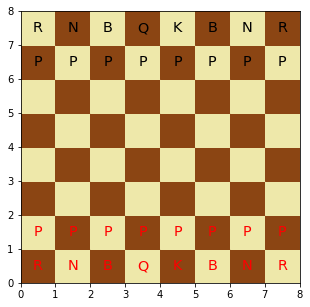

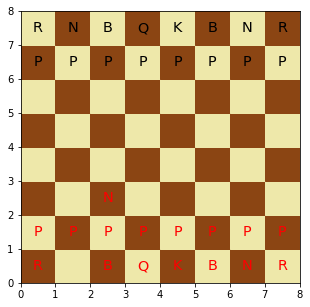

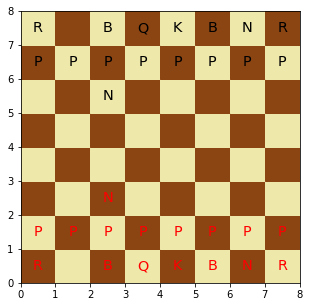

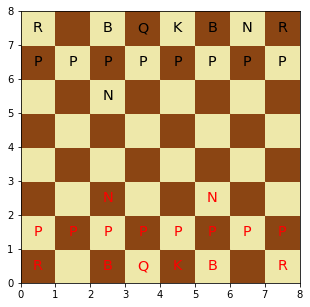

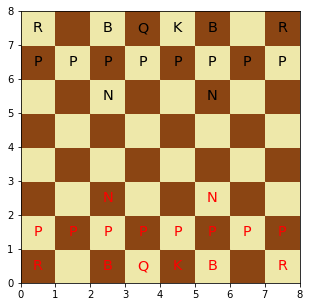

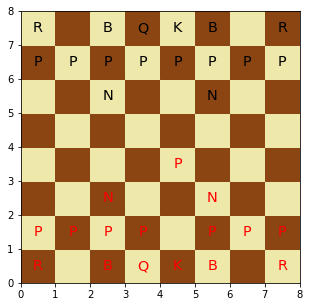

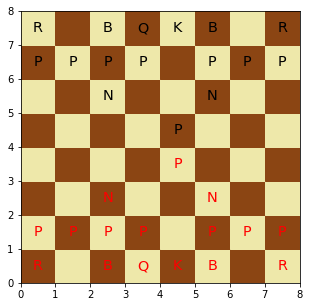

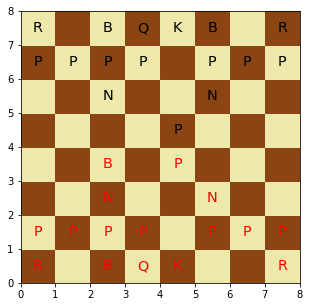

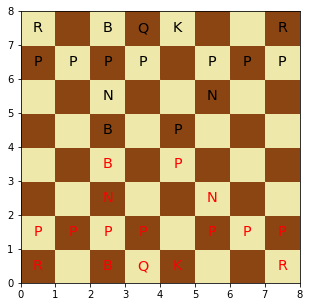

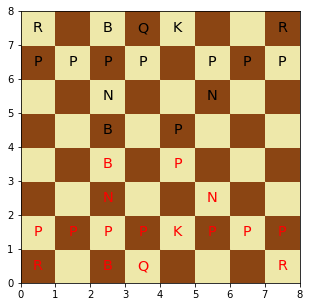

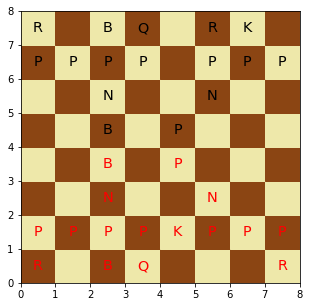

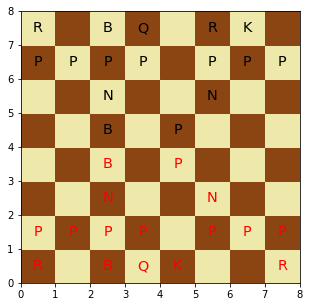

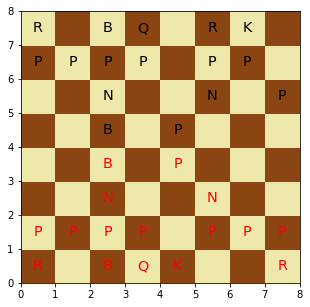

In [172]:
test_b=Board()
test_b.display_board()
test_b.makeMove("Nc3")
test_b.display_board()
test_b.makeMove("Nc6")
test_b.display_board()
test_b.makeMove("Nf3")
test_b.display_board()
test_b.makeMove("Nf6")
test_b.display_board()
test_b.makeMove("e4")
test_b.display_board()
test_b.makeMove("e5")
test_b.display_board()
test_b.makeMove("Bc4")
test_b.display_board()
test_b.makeMove("Bc5")
test_b.display_board()
test_b.makeMove("Ke2")
test_b.display_board()
test_b.makeMove("O-O")
test_b.display_board()
test_b.makeMove("Ke1")
test_b.display_board()
test_b.makeMove("h6")
test_b.display_board()
#l=test_b.possible_moves()
#print(test_b.moves_to_pgnformat(l))
#test_b.makeMove("O-O")
#test_b.display_board()

In [146]:
test_b=Board()
test_b.print_board()
test_b.makeMove("Nc3")
test_b.print_board()
test_b.makeMove("Nc6")
test_b.print_board()
test_b.makeMove("Nf3")
test_b.print_board()
test_b.makeMove("Nf6")
test_b.print_board()
test_b.makeMove("e4")
test_b.print_board()
test_b.makeMove("e5")
test_b.print_board()
test_b.makeMove("Bc4")
test_b.print_board()
test_b.makeMove("Bc5")
test_b.print_board()
test_b.makeMove("O-O")
test_b.print_board()
test_b.makeMove("O-O")
test_b.print_board()

White`s turn
R N B Q K B N R 
P P P P P P P P 
                
                
                
                
P P P P P P P P 
R N B Q K B N R 


Black`s turn
R N B Q K B N R 
P P P P P P P P 
                
                
                
    N           
P P P P P P P P 
R   B Q K B N R 


White`s turn
R   B Q K B N R 
P P P P P P P P 
    N           
                
                
    N           
P P P P P P P P 
R   B Q K B N R 


Black`s turn
R   B Q K B N R 
P P P P P P P P 
    N           
                
                
    N     N     
P P P P P P P P 
R   B Q K B   R 


White`s turn
R   B Q K B   R 
P P P P P P P P 
    N     N     
                
                
    N     N     
P P P P P P P P 
R   B Q K B   R 


Black`s turn
R   B Q K B   R 
P P P P P P P P 
    N     N     
                
        P       
    N     N     
P P P P   P P P 
R   B Q K B   R 


White`s turn
R   B Q K B   R 
P P P P   P P P 
    N     N     
        P       
        P    